In [33]:
# Getting necessary libraries:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import normalize,StandardScaler
from scipy.cluster.hierarchy import dendrogram,linkage,fcluster
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from statsmodels.multivariate.factor import Factor
from statsmodels.multivariate.pca import PCA

In [20]:
import warnings
warnings.filterwarnings("ignore")

In [2]:
# Creating DataFrame
wine1 = pd.read_csv('wine.csv')
wine1.head()

,Type,Alcohol,Malic,Ash,Alcalinity,Magnesium,Phenols,Flavanoids,Nonflavanoids,Proanthocyanins,Color,Hue,Dilution,Proline
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


In [3]:
wine1.Type.value_counts()

2    71
1    59
3    48
Name: Type, dtype: int64

In [4]:
wine2 = wine1.drop('Type',axis = 1)
wine2.head()

,Alcohol,Malic,Ash,Alcalinity,Magnesium,Phenols,Flavanoids,Nonflavanoids,Proanthocyanins,Color,Hue,Dilution,Proline
0,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


In [5]:
wine2.describe().T

,count,mean,std,min,25%,50%,75%,max
Alcohol,178.0,13.000618,0.811827,11.03,12.3625,13.050,13.6775,14.83
Malic,178.0,2.336348,1.117146,0.74,1.6025,1.865,3.0825,5.80
Ash,178.0,2.366517,0.274344,1.36,2.2100,2.360,2.5575,3.23
Alcalinity,178.0,19.494944,3.339564,10.60,17.2000,19.500,21.5000,30.00
Magnesium,178.0,99.741573,14.282484,70.00,88.0000,98.000,107.0000,162.00
Phenols,178.0,2.295112,0.625851,0.98,1.7425,2.355,2.8000,3.88
Flavanoids,178.0,2.029270,0.998859,0.34,1.2050,2.135,2.8750,5.08
Nonflavanoids,178.0,0.361854,0.124453,0.13,0.2700,0.340,0.4375,0.66
Proanthocyanins,178.0,1.590899,0.572359,0.41,1.2500,1.555,1.9500,3.58
Color,178.0,5.058090,2.318286,1.28,3.2200,4.690,6.2000,13.00


In [6]:
wine2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 13 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Alcohol          178 non-null    float64
 1   Malic            178 non-null    float64
 2   Ash              178 non-null    float64
 3   Alcalinity       178 non-null    float64
 4   Magnesium        178 non-null    int64  
 5   Phenols          178 non-null    float64
 6   Flavanoids       178 non-null    float64
 7   Nonflavanoids    178 non-null    float64
 8   Proanthocyanins  178 non-null    float64
 9   Color            178 non-null    float64
 10  Hue              178 non-null    float64
 11  Dilution         178 non-null    float64
 12  Proline          178 non-null    int64  
dtypes: float64(11), int64(2)
memory usage: 18.2 KB


In [7]:
wine2.corr()

,Alcohol,Malic,Ash,Alcalinity,Magnesium,Phenols,Flavanoids,Nonflavanoids,Proanthocyanins,Color,Hue,Dilution,Proline
Alcohol,1.000000,0.094397,0.211545,-0.310235,0.270798,0.289101,0.236815,-0.155929,0.136698,0.546364,-0.071747,0.072343,0.643720
Malic,0.094397,1.000000,0.164045,0.288500,-0.054575,-0.335167,-0.411007,0.292977,-0.220746,0.248985,-0.561296,-0.368710,-0.192011
Ash,0.211545,0.164045,1.000000,0.443367,0.286587,0.128980,0.115077,0.186230,0.009652,0.258887,-0.074667,0.003911,0.223626
Alcalinity,-0.310235,0.288500,0.443367,1.000000,-0.083333,-0.321113,-0.351370,0.361922,-0.197327,0.018732,-0.273955,-0.276769,-0.440597
Magnesium,0.270798,-0.054575,0.286587,-0.083333,1.000000,0.214401,0.195784,-0.256294,0.236441,0.199950,0.055398,0.066004,0.393351
Phenols,0.289101,-0.335167,0.128980,-0.321113,0.214401,1.000000,0.864564,-0.449935,0.612413,-0.055136,0.433681,0.699949,0.498115
Flavanoids,0.236815,-0.411007,0.115077,-0.351370,0.195784,0.864564,1.000000,-0.537900,0.652692,-0.172379,0.543479,0.787194,0.494193
Nonflavanoids,-0.155929,0.292977,0.186230,0.361922,-0.256294,-0.449935,-0.537900,1.000000,-0.365845,0.139057,-0.262640,-0.503270,-0.311385
Proanthocyanins,0.136698,-0.220746,0.009652,-0.197327,0.236441,0.612413,0.652692,-0.365845,1.000000,-0.025250,0.295544,0.519067,0.330417
Color,0.546364,0.248985,0.258887,0.018732,0.199950,-0.055136,-0.172379,0.139057,-0.025250,1.000000,-0.521813,-0.428815,0.316100


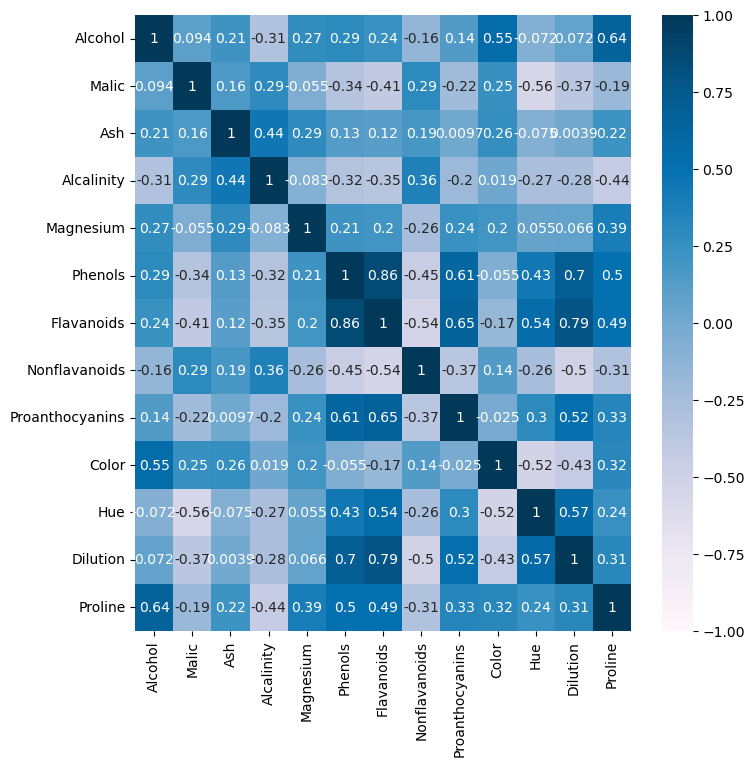

In [8]:
plt.figure(figsize=(8,8))
sns.heatmap(wine2.corr(),vmax=1,vmin=-1,cmap='PuBu',annot=True)
plt.show()

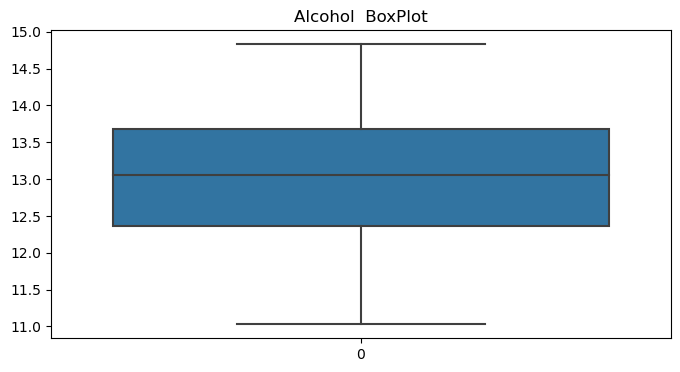

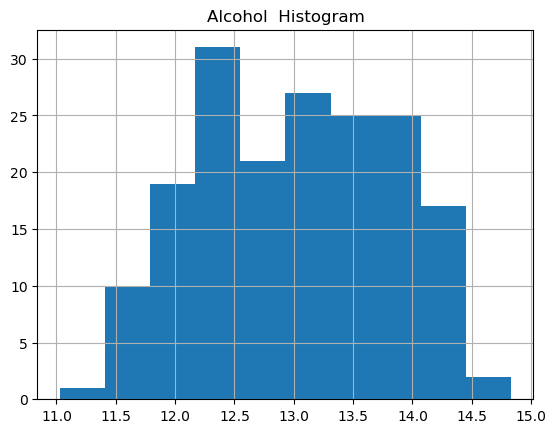

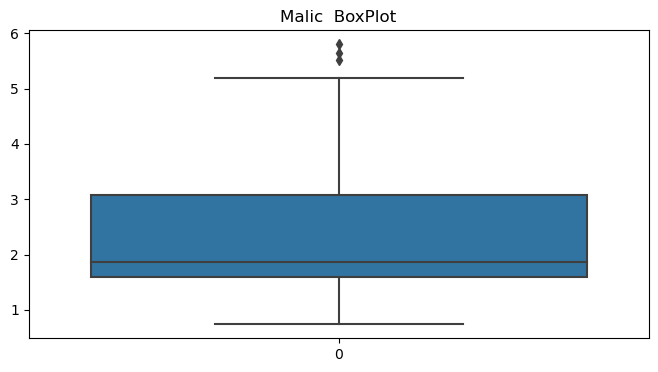

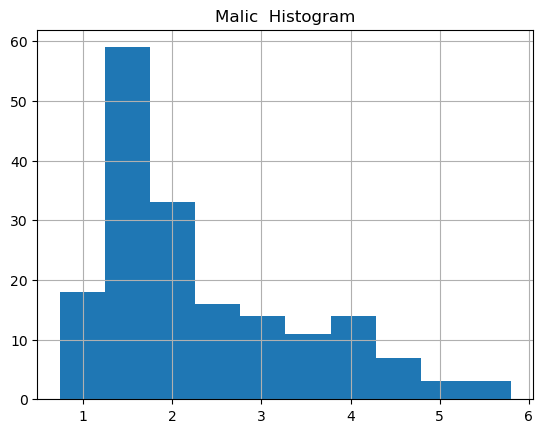

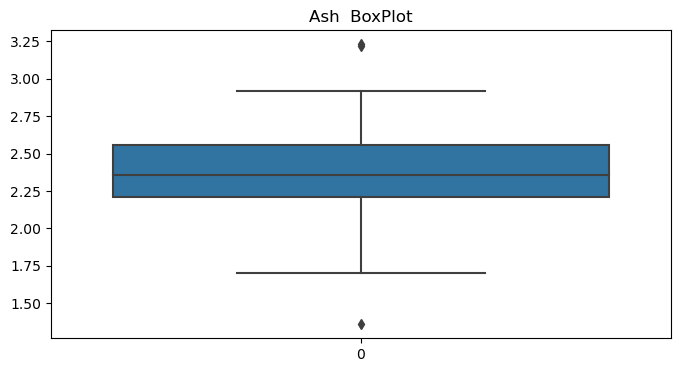

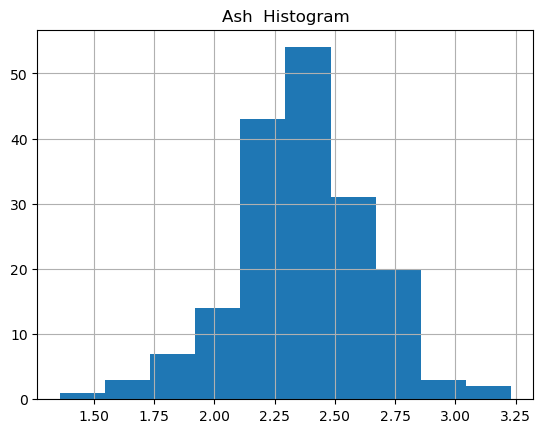

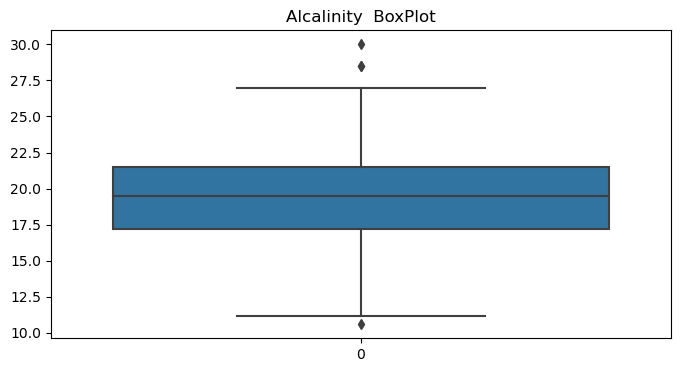

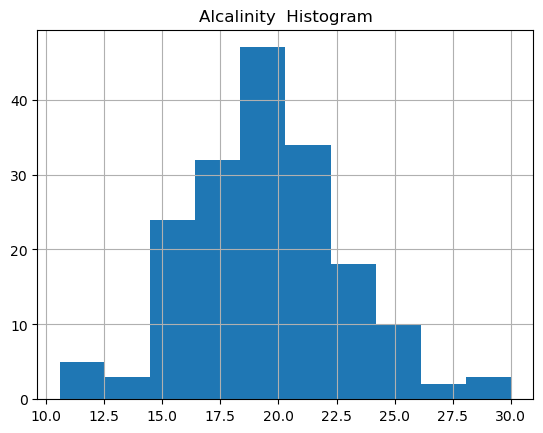

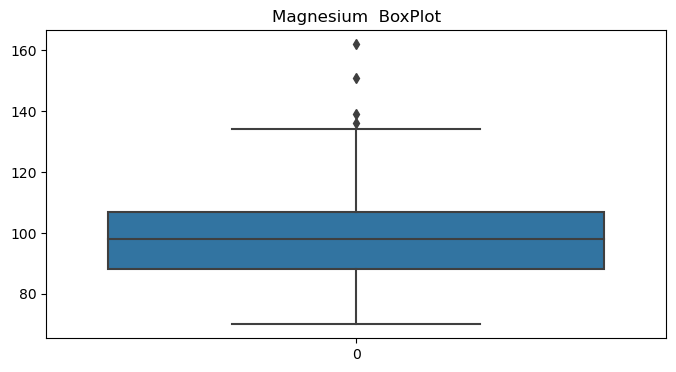

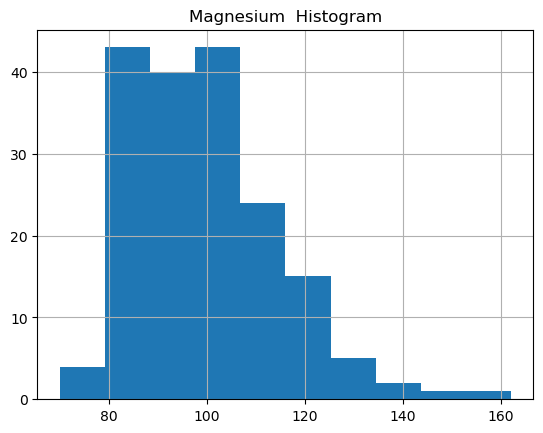

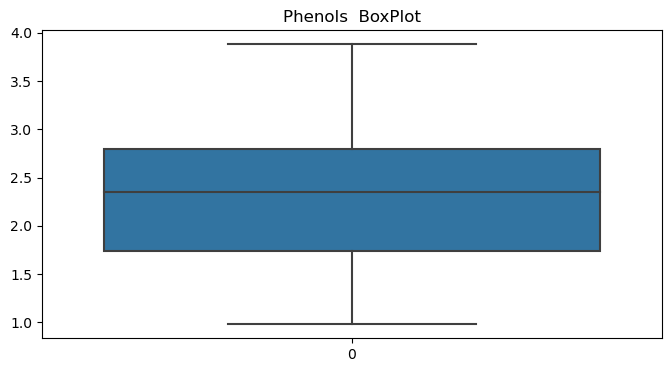

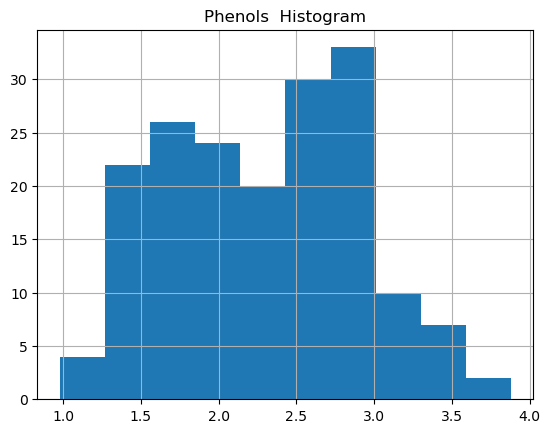

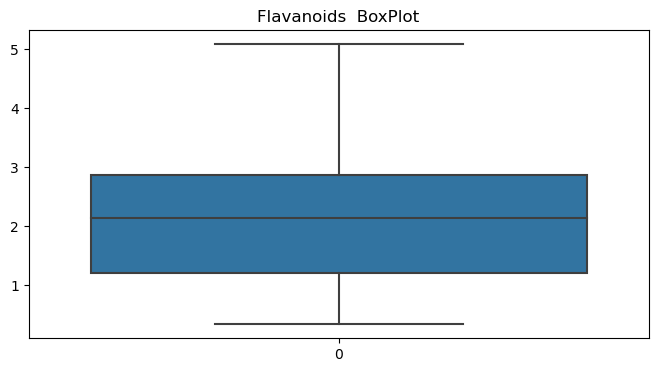

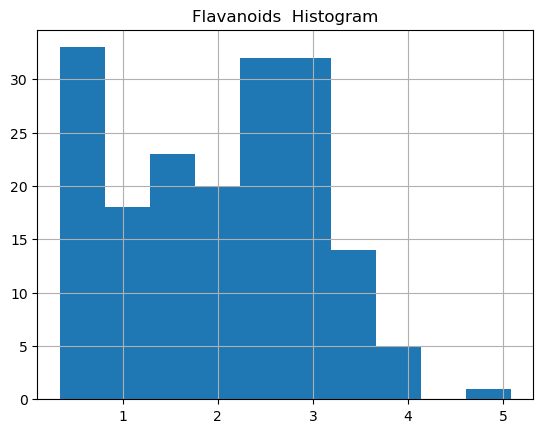

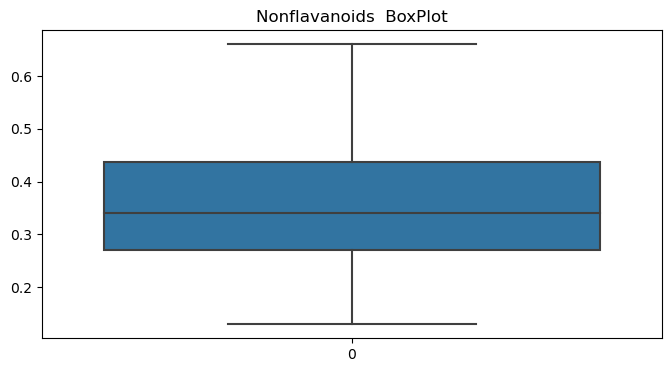

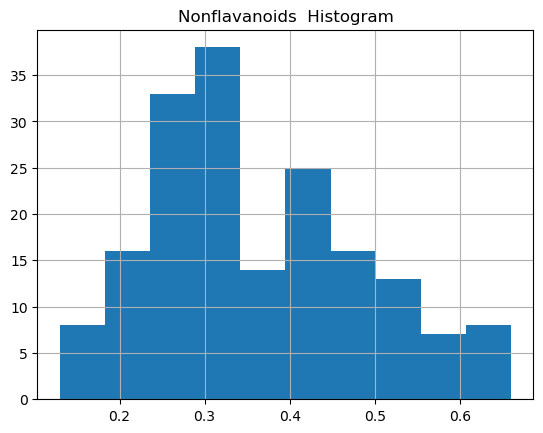

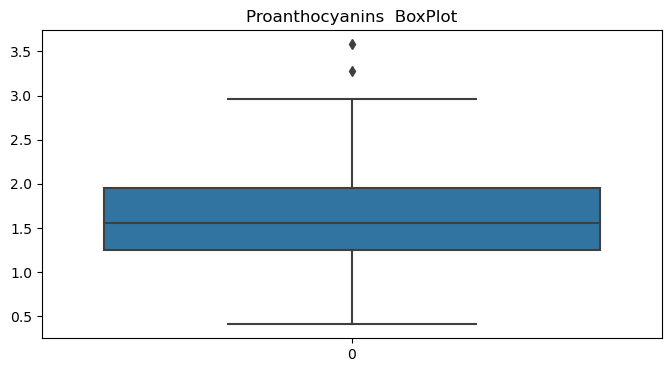

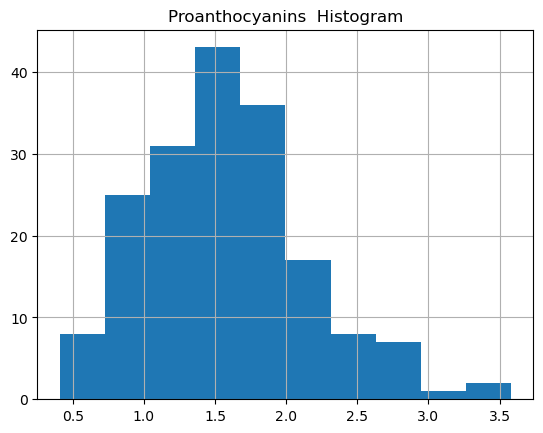

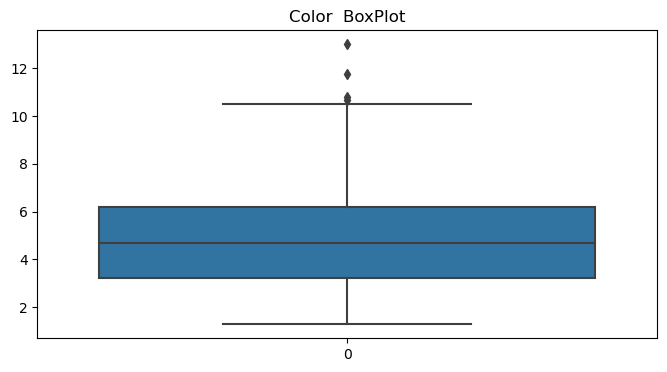

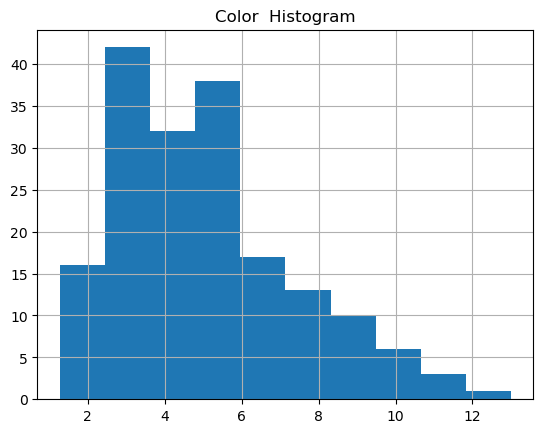

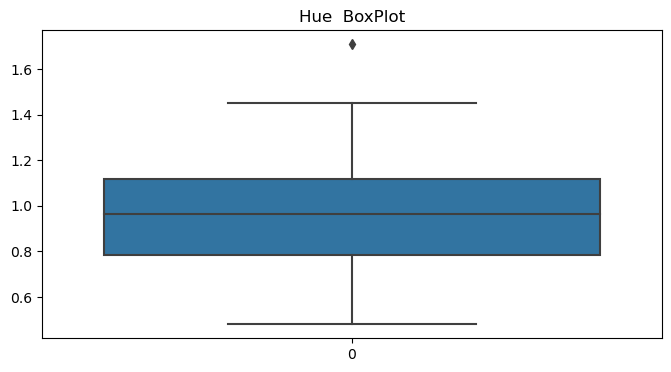

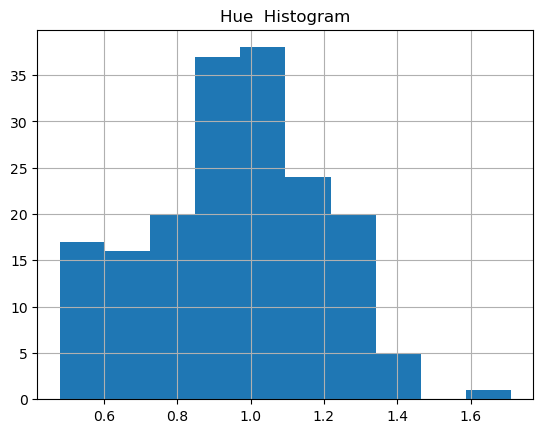

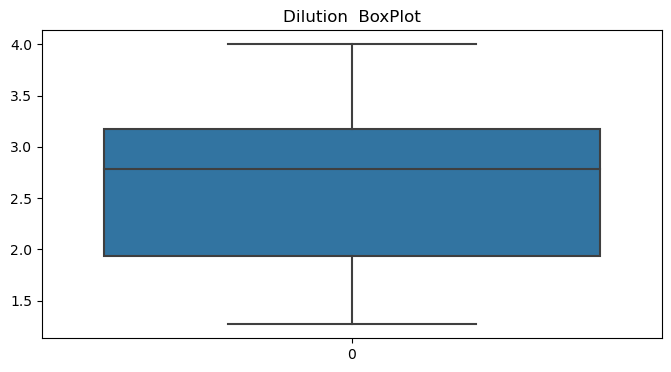

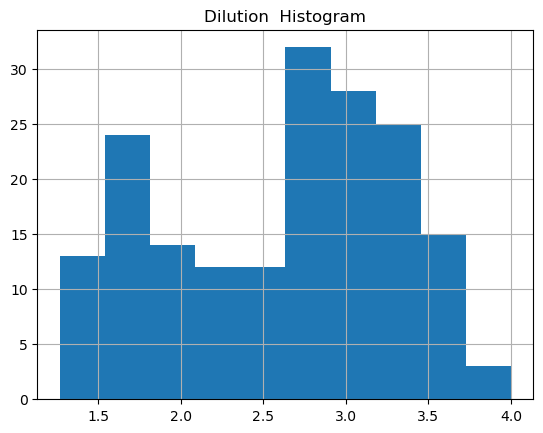

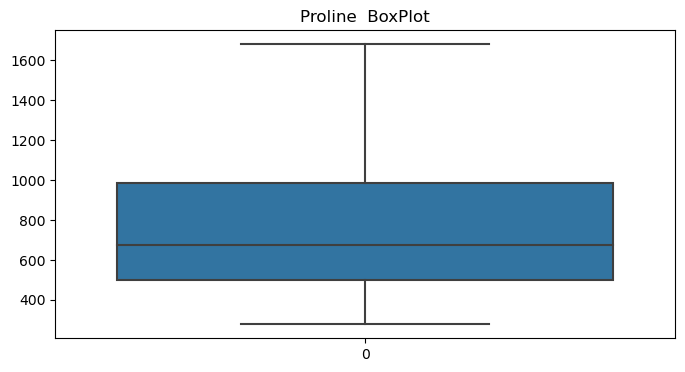

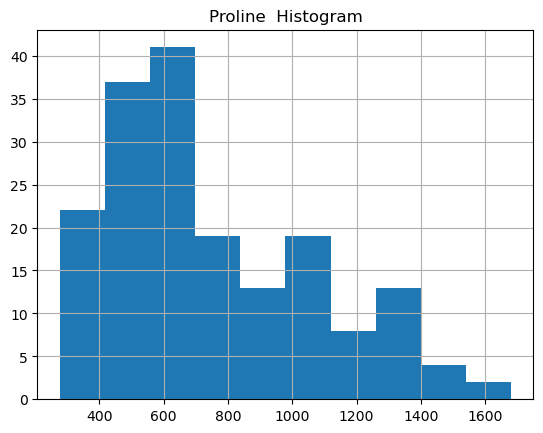

In [9]:
#Univariate Analysis:
for i in wine2.columns:
    plt.figure(figsize = (8,4))
    sns.boxplot(data= wine2[i])
    plt.title(i + '  BoxPlot')
    plt.show()
    wine2[i].hist(bins = 10)
    plt.title(i + '  Histogram')
    plt.show()

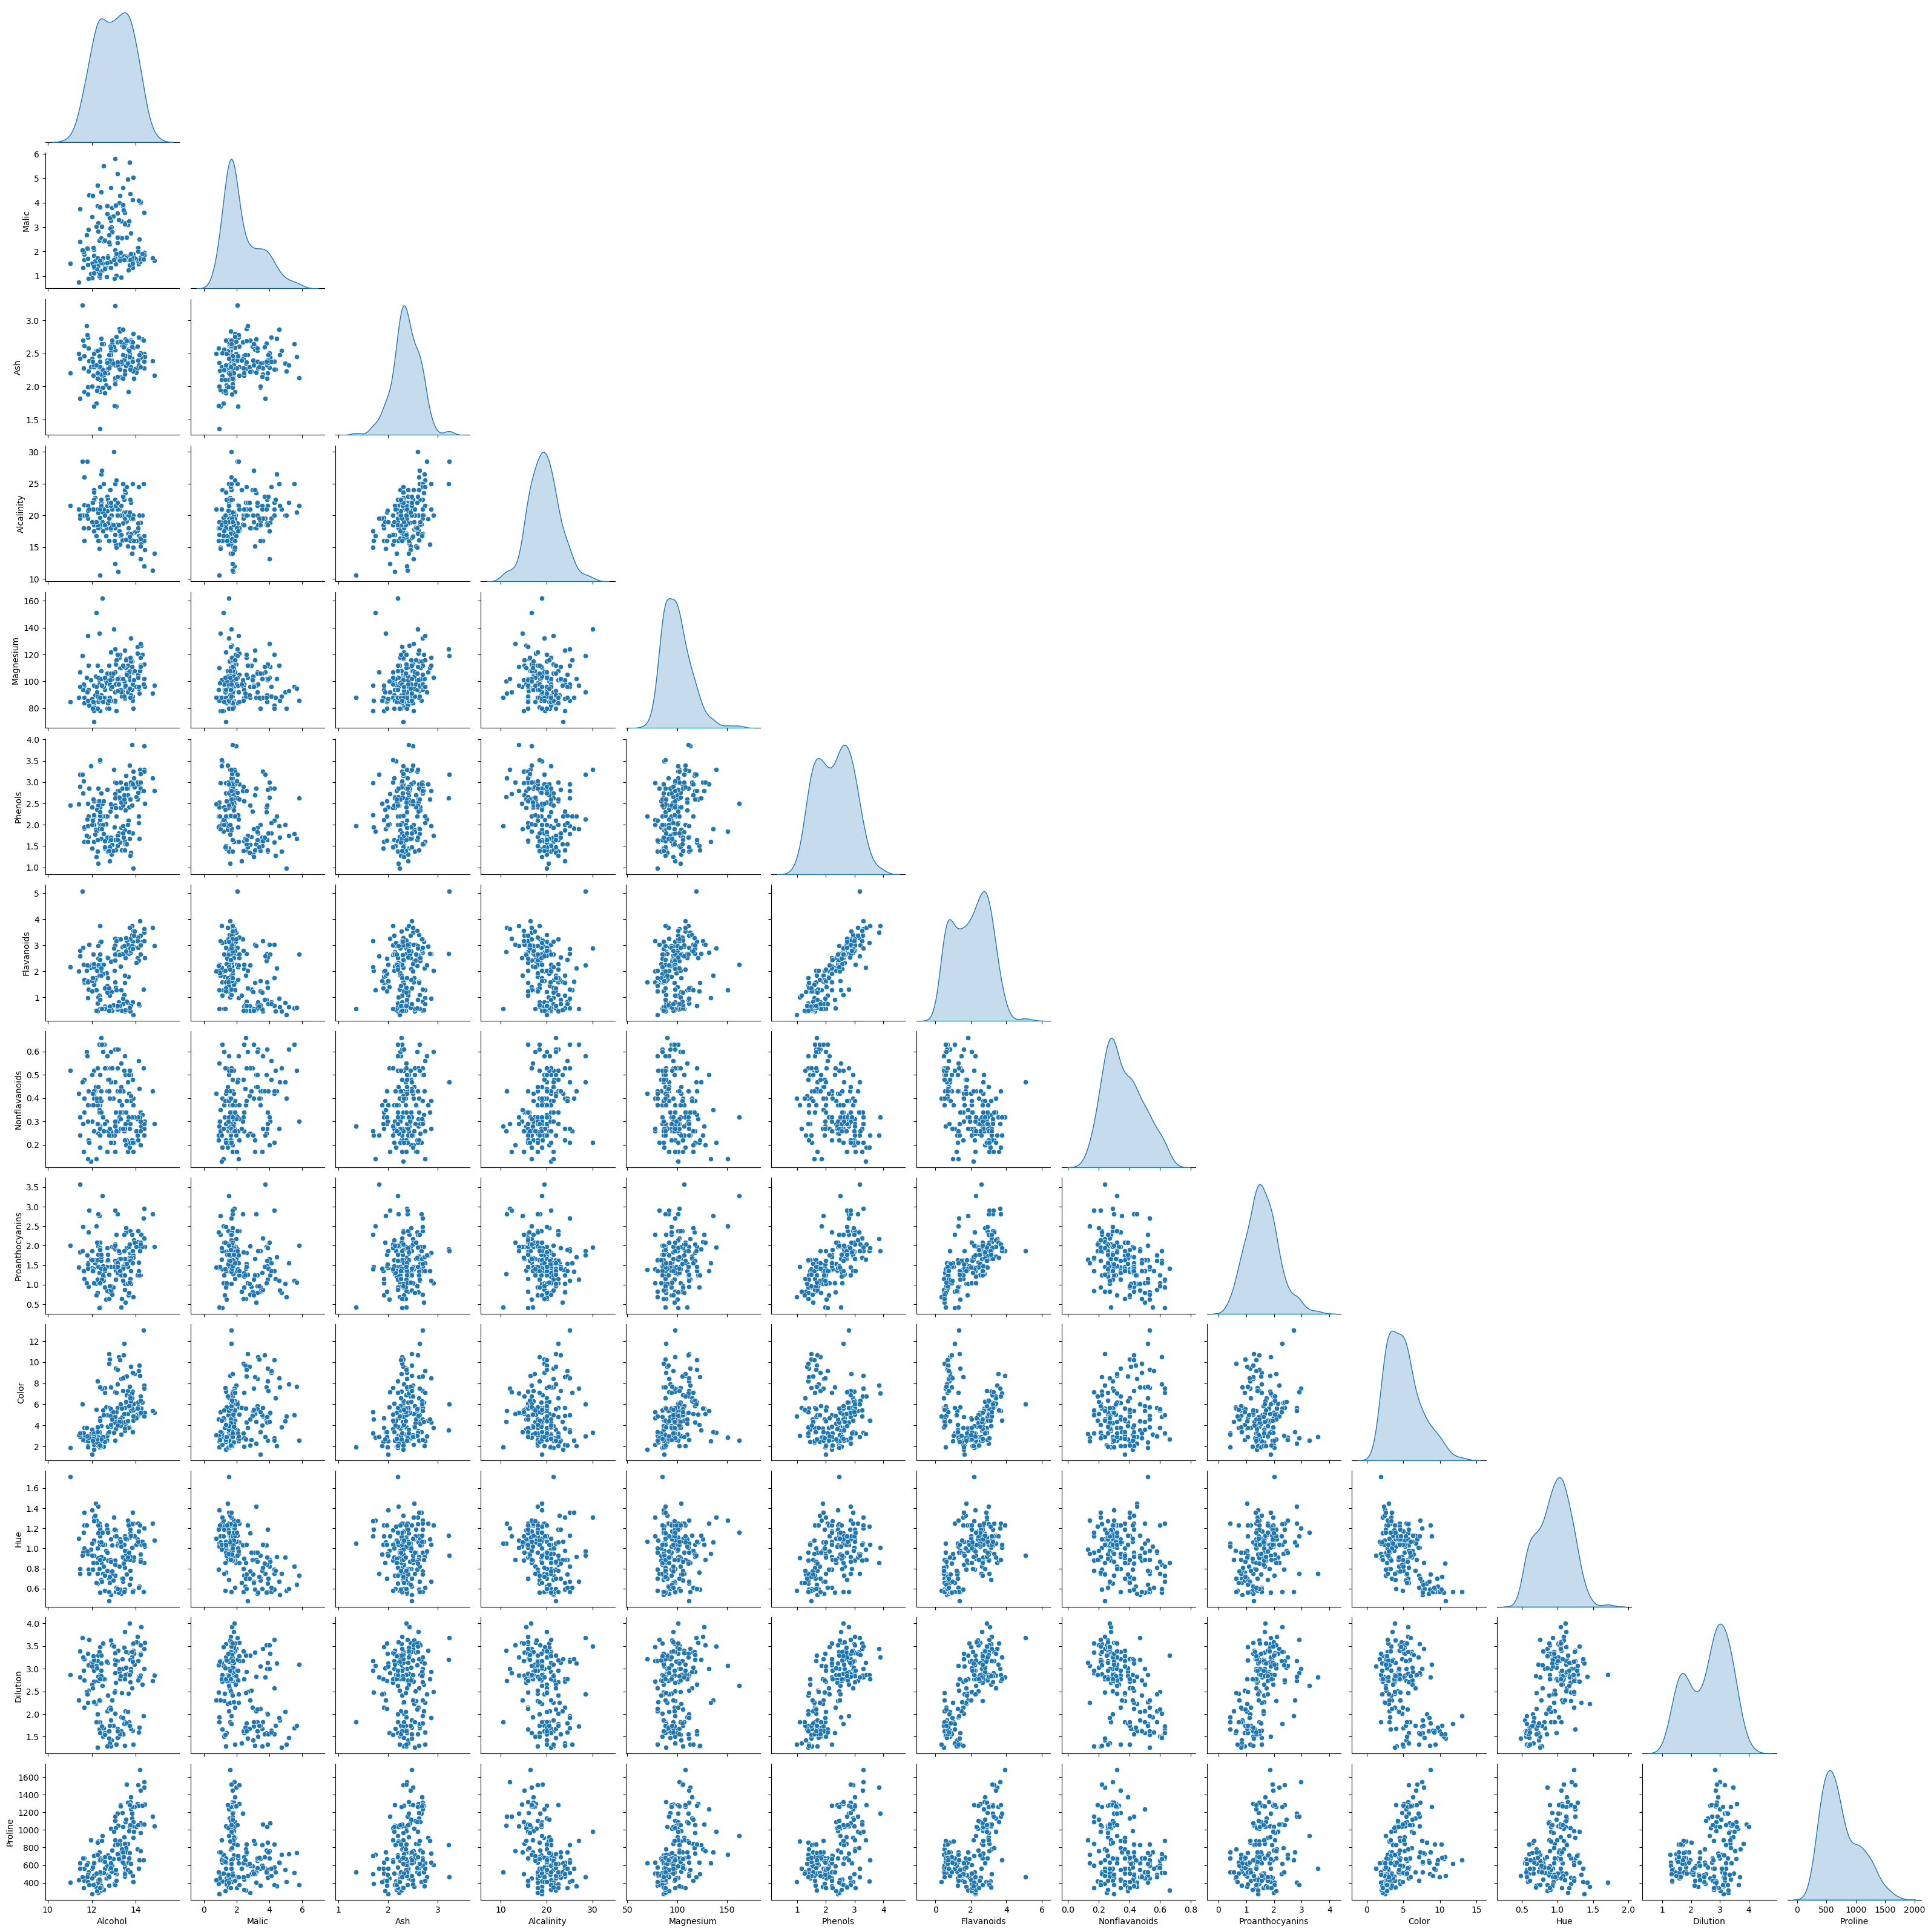

In [10]:
sns.pairplot(data = wine2,corner = True,diag_kind='kde')
plt.show()

In [11]:
#Let's normalize & standardise the data:
scaler = StandardScaler()
wine3 = scaler.fit_transform(wine2)
wine3 = pd.DataFrame(wine3,columns=wine2.columns)
wine3.head()

,Alcohol,Malic,Ash,Alcalinity,Magnesium,Phenols,Flavanoids,Nonflavanoids,Proanthocyanins,Color,Hue,Dilution,Proline
0,1.518613,-0.562250,0.232053,-1.169593,1.913905,0.808997,1.034819,-0.659563,1.224884,0.251717,0.362177,1.847920,1.013009
1,0.246290,-0.499413,-0.827996,-2.490847,0.018145,0.568648,0.733629,-0.820719,-0.544721,-0.293321,0.406051,1.113449,0.965242
2,0.196879,0.021231,1.109334,-0.268738,0.088358,0.808997,1.215533,-0.498407,2.135968,0.269020,0.318304,0.788587,1.395148
3,1.691550,-0.346811,0.487926,-0.809251,0.930918,2.491446,1.466525,-0.981875,1.032155,1.186068,-0.427544,1.184071,2.334574
4,0.295700,0.227694,1.840403,0.451946,1.281985,0.808997,0.663351,0.226796,0.401404,-0.319276,0.362177,0.449601,-0.037874


In [12]:
wine4 = pd.DataFrame(normalize(wine2),columns=wine2.columns)
wine4.head()

,Alcohol,Malic,Ash,Alcalinity,Magnesium,Phenols,Flavanoids,Nonflavanoids,Proanthocyanins,Color,Hue,Dilution,Proline
0,0.013264,0.001594,0.002265,0.014542,0.118383,0.002610,0.002852,0.000261,0.002135,0.005257,0.000969,0.003654,0.992738
1,0.012513,0.001687,0.002029,0.010617,0.094794,0.002512,0.002616,0.000246,0.001213,0.004152,0.000995,0.003223,0.995336
2,0.011063,0.001984,0.002245,0.015636,0.084906,0.002354,0.002724,0.000252,0.002362,0.004775,0.000866,0.002665,0.996176
3,0.009680,0.001314,0.001684,0.011317,0.076119,0.002593,0.002351,0.000162,0.001468,0.005254,0.000579,0.002324,0.996961
4,0.017775,0.003477,0.003853,0.028193,0.158418,0.003759,0.003611,0.000524,0.002443,0.005800,0.001396,0.003934,0.986753


## Clustering : Hierarchical (Without PCA)

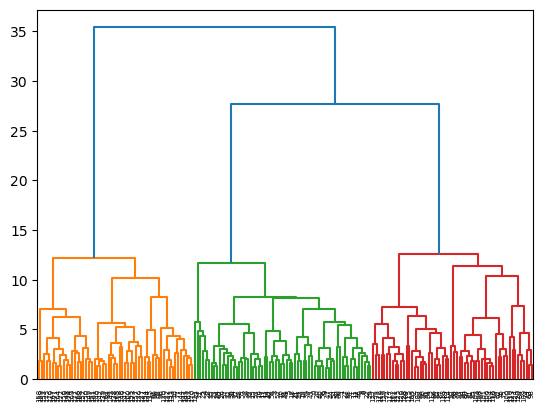

In [13]:
#Plotting dendogram using Ward linkage and Euclidean distance metric with standardized data:
ward_eucli_link = linkage(wine3,method = 'ward', metric = 'euclidean')
Dend_ward = dendrogram(ward_eucli_link)

In [14]:
# Making Clusters from above dendogram:
clusters = fcluster(ward_eucli_link,3,criterion='maxclust')

In [15]:
#Let's add cluster to original df for profiling:
wine5 = wine2.copy()
wine5['Cluster_Id'] = clusters

In [16]:
profiled = wine5.groupby('Cluster_Id').mean()
profiled['ClusterFreq']= wine5['Cluster_Id'].value_counts()
profiled = profiled.reset_index()
profiled

,Cluster_Id,Alcohol,Malic,Ash,Alcalinity,Magnesium,Phenols,Flavanoids,Nonflavanoids,Proanthocyanins,Color,Hue,Dilution,Proline,ClusterFreq
0,1,13.061607,3.166607,2.412857,21.003571,99.857143,1.694286,0.847857,0.449464,1.129286,6.850179,0.721000,1.727321,624.946429,56
1,2,13.669219,1.970000,2.463125,17.528125,106.156250,2.850000,3.009688,0.291094,1.908125,5.450000,1.071406,3.158437,1076.046875,64
2,3,12.203966,1.938966,2.215172,20.208621,92.551724,2.262931,2.088103,0.355345,1.686552,2.895345,1.060000,2.862241,501.431034,58


## Clustering : KMeans (Without PCA)

In [21]:
wss = []
SS = []
for i in range(2,11):
    KM = KMeans(n_clusters=i,random_state=21)
    KM.fit(wine3)
    wss.append(KM.inertia_)
    SS.append(silhouette_score(wine3,KM.labels_))

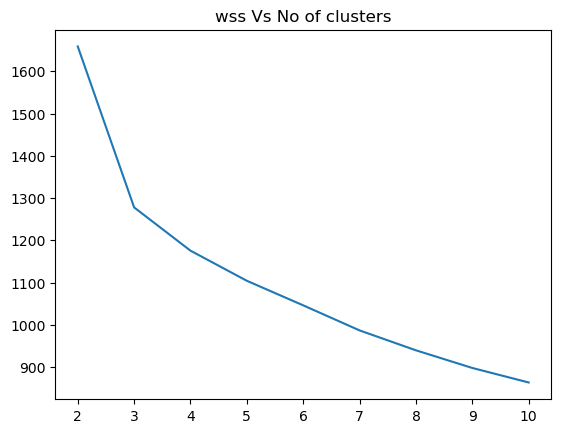

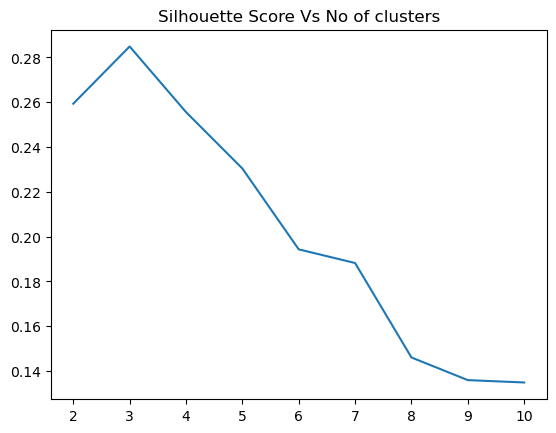

In [22]:
plt.plot(range(2,11),wss)
plt.title('wss Vs No of clusters')
plt.show()
plt.plot(range(2,11),SS)
plt.title('Silhouette Score Vs No of clusters')
plt.show()

In [23]:
# Let's make clusters with K=3 :
kmeans = KMeans(n_clusters=3,random_state=21)
kmeans.fit(wine3)
labels = kmeans.labels_
Silhouette_score = silhouette_score(wine3,labels)
Silhouette_score

0.2848589191898987

In [24]:
#Let's add cluster to original df for profiling:
wine6 = wine2.copy()
wine6['Cluster_Id'] = labels

In [25]:
profiled = wine6.groupby('Cluster_Id').mean()
profiled['ClusterFreq']= wine6['Cluster_Id'].value_counts()
profiled = profiled.reset_index()
profiled

,Cluster_Id,Alcohol,Malic,Ash,Alcalinity,Magnesium,Phenols,Flavanoids,Nonflavanoids,Proanthocyanins,Color,Hue,Dilution,Proline,ClusterFreq
0,0,13.676774,1.997903,2.466290,17.462903,107.967742,2.847581,3.003226,0.292097,1.922097,5.453548,1.065484,3.163387,1100.225806,62
1,1,13.134118,3.307255,2.417647,21.241176,98.666667,1.683922,0.818824,0.451961,1.145882,7.234706,0.691961,1.696667,619.058824,51
2,2,12.250923,1.897385,2.231231,20.063077,92.738462,2.247692,2.050000,0.357692,1.624154,2.973077,1.062708,2.803385,510.169231,65


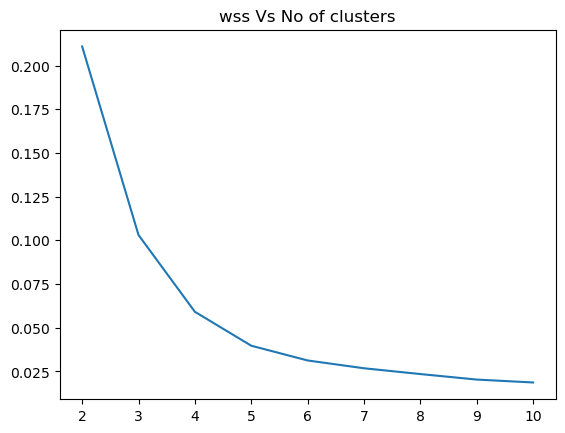

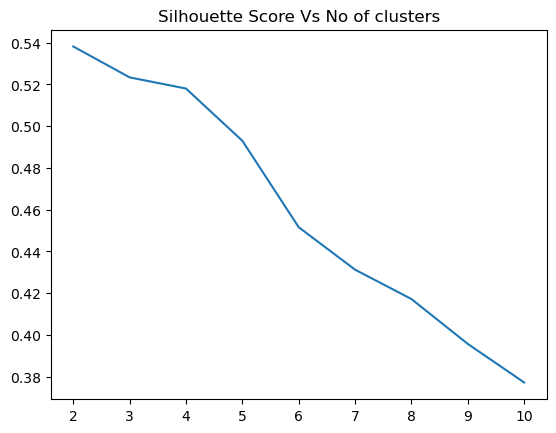

,Cluster_Id,Alcohol,Malic,Ash,Alcalinity,Magnesium,Phenols,Flavanoids,Nonflavanoids,Proanthocyanins,Color,Hue,Dilution,Proline,ClusterFreq
0,0,12.876173,2.658889,2.351852,20.235802,98.432099,1.995062,1.455185,0.408889,1.436049,5.458519,0.874444,2.277654,629.246914,81
1,1,12.330541,2.241622,2.308108,20.921622,97.837838,2.288649,2.141892,0.349730,1.591081,3.651892,1.000000,2.689459,415.162162,37
2,2,13.581833,1.959333,2.422333,17.615000,102.683333,2.704167,2.734833,0.305833,1.799833,5.384667,1.043267,3.014667,1110.283333,60


In [28]:
wss = []
SS = []
for i in range(2,11):
    KM = KMeans(n_clusters=i,random_state=21)
    KM.fit(wine4)
    wss.append(KM.inertia_)
    SS.append(silhouette_score(wine4,KM.labels_))

plt.plot(range(2,11),wss)
plt.title('wss Vs No of clusters')
plt.show()
plt.plot(range(2,11),SS)
plt.title('Silhouette Score Vs No of clusters')
plt.show()


In [29]:

# Let's make clusters with K=2 :
kmeans = KMeans(n_clusters=2,random_state=21)
kmeans.fit(wine4)
labels = kmeans.labels_
Silhouette_score = silhouette_score(wine4,labels)
Silhouette_score

#Let's add cluster to original df for profiling:
wine6 = wine2.copy()
wine6['Cluster_Id'] = labels

profiled = wine6.groupby('Cluster_Id').mean()
profiled['ClusterFreq']= wine6['Cluster_Id'].value_counts()
profiled = profiled.reset_index()
profiled


,Cluster_Id,Alcohol,Malic,Ash,Alcalinity,Magnesium,Phenols,Flavanoids,Nonflavanoids,Proanthocyanins,Color,Hue,Dilution,Proline,ClusterFreq
0,0,13.301091,2.232182,2.393818,18.690909,100.936364,2.437000,2.214182,0.353000,1.657455,5.605909,0.970236,2.736909,915.427273,110
1,1,12.514559,2.504853,2.322353,20.795588,97.808824,2.065588,1.730147,0.376176,1.483235,4.171912,0.936765,2.409118,474.264706,68


In [30]:

# Let's make clusters with K=3 :
kmeans = KMeans(n_clusters=3,random_state=21)
kmeans.fit(wine4)
labels = kmeans.labels_
Silhouette_score = silhouette_score(wine4,labels)

#Let's add cluster to original df for profiling:
wine6 = wine2.copy()
wine6['Cluster_Id'] = labels

profiled = wine6.groupby('Cluster_Id').mean()
profiled['ClusterFreq']= wine6['Cluster_Id'].value_counts()
profiled = profiled.reset_index()
profiled

,Cluster_Id,Alcohol,Malic,Ash,Alcalinity,Magnesium,Phenols,Flavanoids,Nonflavanoids,Proanthocyanins,Color,Hue,Dilution,Proline,ClusterFreq
0,0,12.876173,2.658889,2.351852,20.235802,98.432099,1.995062,1.455185,0.408889,1.436049,5.458519,0.874444,2.277654,629.246914,81
1,1,12.330541,2.241622,2.308108,20.921622,97.837838,2.288649,2.141892,0.349730,1.591081,3.651892,1.000000,2.689459,415.162162,37
2,2,13.581833,1.959333,2.422333,17.615000,102.683333,2.704167,2.734833,0.305833,1.799833,5.384667,1.043267,3.014667,1110.283333,60


In [31]:

# Let's make clusters with K=4 :
kmeans = KMeans(n_clusters=4,random_state=21)
kmeans.fit(wine4)
labels = kmeans.labels_
Silhouette_score = silhouette_score(wine4,labels)

#Let's add cluster to original df for profiling:
wine6 = wine2.copy()
wine6['Cluster_Id'] = labels

profiled = wine6.groupby('Cluster_Id').mean()
profiled['ClusterFreq']= wine6['Cluster_Id'].value_counts()
profiled = profiled.reset_index()
profiled

,Cluster_Id,Alcohol,Malic,Ash,Alcalinity,Magnesium,Phenols,Flavanoids,Nonflavanoids,Proanthocyanins,Color,Hue,Dilution,Proline,ClusterFreq
0,0,12.921364,2.608788,2.352879,19.824242,98.878788,2.106515,1.577879,0.415303,1.469697,5.504242,0.894697,2.382121,681.787879,66
1,1,12.525778,2.526000,2.304000,20.600000,97.222222,2.017111,1.655111,0.360889,1.480889,4.320000,0.927778,2.362889,488.822222,45
2,2,12.360714,2.123571,2.394286,22.071429,99.142857,2.307857,2.315714,0.356429,1.585000,3.582143,0.960714,2.766429,358.142857,14
3,3,13.671509,1.892264,2.429245,17.466038,103.113208,2.762642,2.833396,0.297547,1.836792,5.519057,1.059925,3.067925,1149.773585,53


In [32]:

# Let's make clusters with K=5 :
kmeans = KMeans(n_clusters=5,random_state=21)
kmeans.fit(wine4)
labels = kmeans.labels_
Silhouette_score = silhouette_score(wine4,labels)

#Let's add cluster to original df for profiling:
wine6 = wine2.copy()
wine6['Cluster_Id'] = labels

profiled = wine6.groupby('Cluster_Id').mean()
profiled['ClusterFreq']= wine6['Cluster_Id'].value_counts()
profiled = profiled.reset_index()
profiled

,Cluster_Id,Alcohol,Malic,Ash,Alcalinity,Magnesium,Phenols,Flavanoids,Nonflavanoids,Proanthocyanins,Color,Hue,Dilution,Proline,ClusterFreq
0,0,12.782955,2.659773,2.331136,20.272727,98.500000,1.914773,1.404545,0.406136,1.415227,4.831591,0.888636,2.305909,580.477273,44
1,1,13.796667,1.894444,2.424667,16.860000,103.888889,2.848000,3.015556,0.287111,1.897111,5.727778,1.076222,3.091111,1201.600000,45
2,2,12.260000,2.090000,2.384167,21.958333,98.250000,2.347500,2.308333,0.365000,1.597500,3.134167,1.014167,2.882500,346.833333,12
3,3,12.419310,2.372759,2.269655,20.296552,96.413793,2.165172,1.960690,0.344483,1.538276,3.941724,0.980345,2.519310,449.034483,29
4,4,12.990208,2.493750,2.398542,20.152083,99.375000,2.190833,1.648958,0.401042,1.495000,5.793333,0.881167,2.430625,753.125000,48


## PCA : Pricipal Component Analysis:

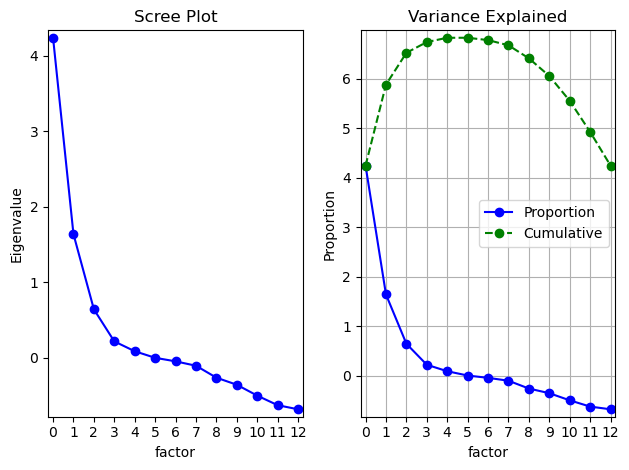

In [37]:
model = Factor(wine3).fit()
model.plot_scree()
plt.grid()
plt.show()

In [42]:
pc = PCA(wine2,ncomp=3,missing=None,standardize=True,normalize=True,method='eig')

In [43]:
pc

Principal Component Analysis(nobs: 178, nvar: 13, transformation: Standardize (Correlation), normalization: True, number of components: 3, method: Eigenvalue, id: 0x2618280d720)

In [44]:
pc.loadings

,comp_0,comp_1,comp_2
Alcohol,-0.144329,0.483652,0.207383
Malic,0.245188,0.224931,-0.089013
Ash,0.002051,0.316069,-0.626224
Alcalinity,0.239320,-0.010591,-0.612080
Magnesium,-0.141992,0.299634,-0.130757
Phenols,-0.394661,0.065040,-0.146179
Flavanoids,-0.422934,-0.003360,-0.150682
Nonflavanoids,0.298533,0.028779,-0.170368
Proanthocyanins,-0.313429,0.039302,-0.149454
Color,0.088617,0.529996,0.137306


In [48]:
wine_pca=pc.factors

,comp_0,comp_1,comp_2
0,-0.114600,0.068468,0.010330
1,-0.076341,-0.015814,0.126308
2,-0.086958,0.048911,-0.061259
3,-0.129813,0.130744,0.010982
4,-0.034860,0.041259,-0.126323
...,...,...,...
173,0.116458,0.105126,0.021352
174,0.089902,0.083351,-0.012938
175,0.092524,0.130958,0.058649
176,0.082476,0.108971,0.034325


Let's proceed and make clusters with PCs:

## Clustering : Hierarchical (With PCA)

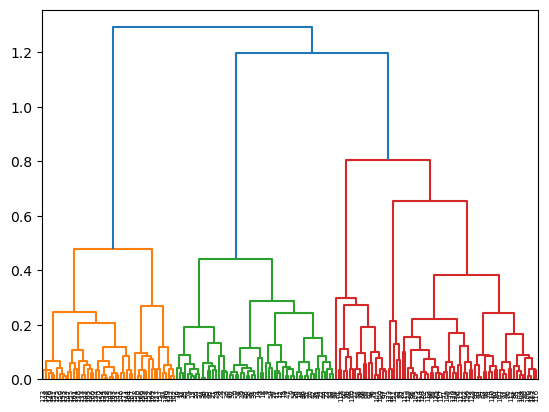

In [49]:
#Plotting dendogram using Ward linkage and Euclidean distance metric with standardized data:
ward_eucli_link = linkage(wine_pca,method = 'ward', metric = 'euclidean')
Dend_ward = dendrogram(ward_eucli_link)



In [50]:
# Making Clusters from above dendogram:
clusters = fcluster(ward_eucli_link,3,criterion='maxclust')

#Let's add cluster to original df for profiling:
wine_5 = wine2.copy()
wine_5['Cluster_Id'] = clusters

profiled = wine_5.groupby('Cluster_Id').mean()
profiled['ClusterFreq']= wine_5['Cluster_Id'].value_counts()
profiled = profiled.reset_index()
profiled

,Cluster_Id,Alcohol,Malic,Ash,Alcalinity,Magnesium,Phenols,Flavanoids,Nonflavanoids,Proanthocyanins,Color,Hue,Dilution,Proline,ClusterFreq
0,1,13.157708,3.386042,2.437083,21.510417,98.541667,1.681667,0.788542,0.455833,1.167708,7.410833,0.684375,1.698542,627.500000,48
1,2,13.754211,2.015439,2.449474,16.959649,107.368421,2.853333,2.995088,0.287895,1.942105,5.570877,1.061228,3.162807,1116.298246,57
2,3,12.308904,1.896712,2.255342,20.149315,94.575342,2.262603,2.090959,0.357808,1.594932,3.110685,1.055973,2.781781,536.958904,73


## Clustering : KMeans (With PCA)

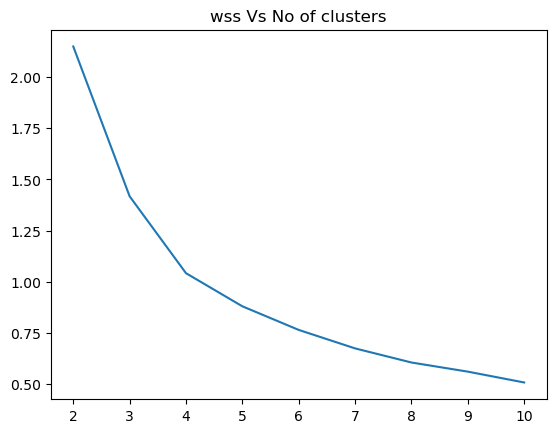

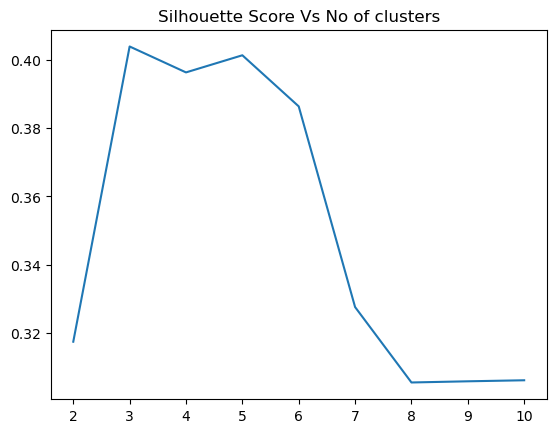

In [51]:
wss = []
SS = []
for i in range(2,11):
    KM = KMeans(n_clusters=i,random_state=21)
    KM.fit(wine_pca)
    wss.append(KM.inertia_)
    SS.append(silhouette_score(wine_pca,KM.labels_))

plt.plot(range(2,11),wss)
plt.title('wss Vs No of clusters')
plt.show()
plt.plot(range(2,11),SS)
plt.title('Silhouette Score Vs No of clusters')
plt.show()

In [52]:
# Let's make clusters with K=3 :
kmeans = KMeans(n_clusters=3,random_state=21)
kmeans.fit(wine_pca)
labels = kmeans.labels_

#Let's add cluster to original df for profiling:
wine_6 = wine2.copy()
wine_6['Cluster_Id'] = labels

profiled = wine_6.groupby('Cluster_Id').mean()
profiled['ClusterFreq']= wine_6['Cluster_Id'].value_counts()
profiled = profiled.reset_index()
profiled


,Cluster_Id,Alcohol,Malic,Ash,Alcalinity,Magnesium,Phenols,Flavanoids,Nonflavanoids,Proanthocyanins,Color,Hue,Dilution,Proline,ClusterFreq
0,0,13.711475,1.997049,2.453770,17.281967,107.786885,2.842131,2.969180,0.289180,1.922951,5.444590,1.067705,3.154754,1110.639344,61
1,1,13.138077,3.261731,2.416538,21.159615,98.884615,1.700192,0.828077,0.453846,1.131923,7.156538,0.698269,1.701154,621.576923,52
2,2,12.223538,1.914462,2.244615,20.240000,92.876923,2.257692,2.108154,0.356462,1.646462,3.016615,1.061323,2.830462,505.784615,65


In [53]:
# Let's make clusters with K=5 :
kmeans = KMeans(n_clusters=5,random_state=21)
kmeans.fit(wine_pca)
labels = kmeans.labels_

#Let's add cluster to original df for profiling:
wine_6 = wine2.copy()
wine_6['Cluster_Id'] = labels

profiled = wine_6.groupby('Cluster_Id').mean()
profiled['ClusterFreq']= wine_6['Cluster_Id'].value_counts()
profiled = profiled.reset_index()
profiled


,Cluster_Id,Alcohol,Malic,Ash,Alcalinity,Magnesium,Phenols,Flavanoids,Nonflavanoids,Proanthocyanins,Color,Hue,Dilution,Proline,ClusterFreq
0,0,12.629545,1.450455,1.976818,16.531818,98.045455,2.068182,1.701364,0.342727,1.282273,3.695909,1.062545,2.392727,651.000000,22
1,1,12.163256,2.003721,2.271395,20.544186,90.325581,2.295116,2.129302,0.356977,1.693721,2.850930,1.026744,2.886744,482.395349,43
2,2,13.171489,3.431702,2.441064,21.595745,98.829787,1.674894,0.792979,0.452766,1.165957,7.452553,0.682979,1.702553,627.021277,47
3,3,13.773636,2.009273,2.447455,16.990909,107.309091,2.858000,3.004909,0.286545,1.956364,5.615273,1.061818,3.162727,1124.436364,55
4,4,12.420909,2.363636,2.794545,24.863636,106.000000,2.584545,2.698182,0.407273,1.794545,3.393636,1.127273,3.103636,597.090909,11
